In [1]:
import pandas as pd

In [2]:
ratings_df = pd.read_csv("Dataset\last\XWines_Test_1K_ratings.csv") 
display(ratings_df.head(10))

,RatingID,UserID,WineID,Vintage,Rating,Date
0,3211,1209683,111478,1959,4.5,2016-08-08 00:50:22
1,27878,1209980,111478,1975,4.0,2018-08-12 17:09:39
2,31227,1258705,111478,1975,5.0,2014-11-16 19:52:38
3,41946,1139706,111478,1979,5.0,2014-12-22 02:30:15
4,61700,1240747,111478,1982,4.5,2019-10-21 02:01:10
5,64438,1123010,111478,1982,4.0,2021-01-09 15:58:00
6,64751,1003868,111478,1982,4.0,2018-03-30 09:12:01
7,73066,1224698,111478,1983,3.5,2016-12-26 07:28:24
8,97040,1265698,132977,1987,4.5,2021-11-28 13:38:21
9,101042,1218495,111478,1988,5.0,2017-10-21 12:55:02


In [6]:
wines_df = pd.read_csv("Dataset\last\XWines_Test_100_wines.csv", index_col="WineID")
display(wines_df.head(3))

,WineID,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
WineName,,,,,,,,,,,,,,,,
Origem Merlot,100062,Red,Varietal/100%,['Merlot'],"['Beef', 'Lamb', 'Veal', 'Grilled', 'Pizza', '...",13.0,Full-bodied,Medium,BR,Brazil,1002,Vale dos Vinhedos,10014,Casa Valduga,http://www.casavalduga.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
Reserva Chardonnay,100191,White,Varietal/100%,['Chardonnay'],"['Rich Fish', 'Seafood', 'Risotto', 'Poultry',...",13.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
Dona Antonia Porto Reserva Tawny,101847,Dessert/Port,Assemblage/Blend,"['Touriga Nacional', 'Touriga Franca', 'Tinta ...","['Appetizer', 'Sweet Dessert', 'Blue Cheese']",20.0,Very full-bodied,High,PT,Portugal,1031,Porto,10674,Porto Ferreira,https://sogrape.com/pt/brand/porto-ferreira,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


,UserID
WineID,
100062,21
100191,22
101847,21
102055,25
102079,9
...,...
195476,10
195831,8
196718,5


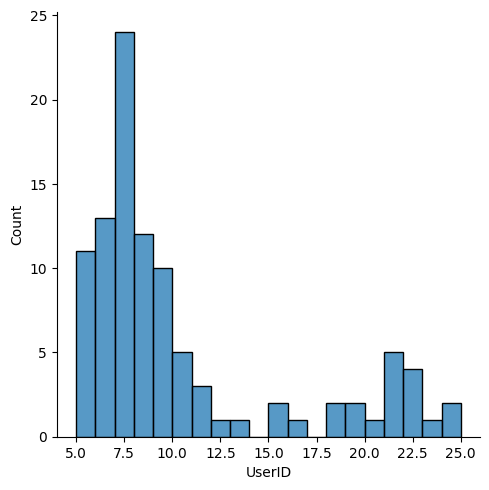

In [9]:
import seaborn as sns

count_ratings_df = ratings_df[['UserID','WineID']].groupby(['WineID']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='UserID', binwidth=1)

,WineID
UserID,
1000045,3
1000064,4
1000196,1
1000227,2
1000272,3
...,...
2046714,1
2048967,1
2049542,1


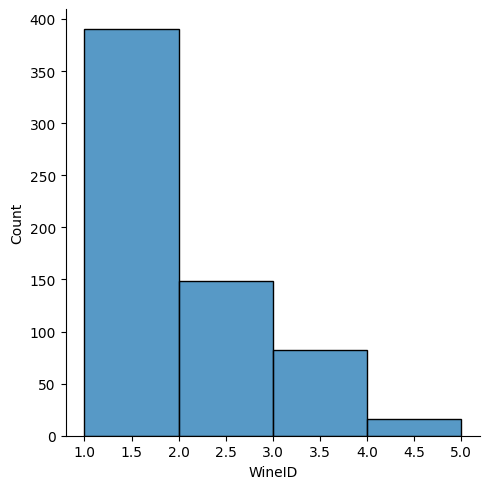

In [15]:
import seaborn as sns

count_ratings_df = ratings_df[['UserID','WineID']].groupby(['UserID']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='WineID', binwidth=1)

,index,WineID,UserID
0,0,102055,25
1,1,179386,24
2,2,167079,23
3,3,193488,22
4,4,100191,22
...,...,...,...
95,95,139693,5
96,96,143806,5
97,97,154979,5
98,98,162391,5


<Axes: xlabel='index', ylabel='UserID'>

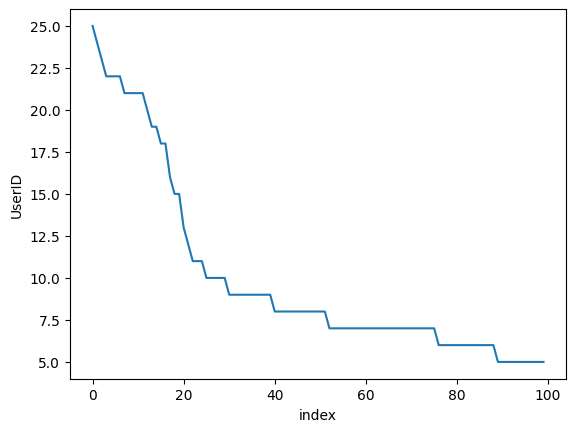

In [10]:
count_ratings_df_ord = count_ratings_df.sort_values(by="UserID", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
sns.lineplot(data=count_ratings_df_ord, x='index', y='UserID')

In [21]:

# 2. Non personalized recommendations: ordering by average rating



average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean()


sorted_avg_ratings_df = average_ratings_df.sort_values(ascending=False)


display(sorted_avg_ratings_df.head(10))

WineID
181199    4.875000
175454    4.750000
141193    4.666667
175908    4.500000
190621    4.500000
187681    4.437500
112875    4.363636
140962    4.333333
102902    4.300000
102079    4.277778
Name: Rating, dtype: float64